In [237]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import datasets
from sklearn import model_selection

import graphviz

In [238]:
data = pd.read_csv('datos_limpios.csv',parse_dates=['fechaapro_matematica_al_21-10-2017'])

Se desea caracterizar el perfil de los estudiantes que no mostraron
dificultades para aprobar el curso de ingreso (CINEU) en matemática
teniendo en cuenta variables como deporte, idioma, procedencia, niveles
educativos de los padres, etc.

Para realizar esto, vamos a implementar arboles de desicion. Los arboles de desicion nos muestran
cuales son las features mas relevantes a la hora de predecir algun target (en este caso nuestro target
seria la fecha de aprobacion del cursillo de nivelación).
Para clasificar el nivel de "dificultad" que tuvo el estudiante en aprobar el cursillo, vamos a dividirlos en 2 categorias segun si aprobo antes o despues de febrero.  
Seguramente se puede refinar mas, pero como primer approach puede funcionar.  
La desicion de dividir en sólo 2 categorias se justifica en el sentido de que hacer mas quizás meteria ruido en un dataset que de por sí, ya es bastante ruidoso (muchisimas columnas, conmuchas categorías).  
Ademas, como queremos que el output del arbol sea legible por un ser humano, lo mejor es mantenerlo simple pero efectivo.

In [239]:
data.columns

Index(['Unnamed: 0', 'nombre_carrera', 'sexo', 'estado_civil', 'vive_con',
       'cant_hijos', 'loc_procedencia', 'loc_periodo_lectivo', 'madre_trabajo',
       'padre_trabajo', 'madre_vive', 'padre_vive', 'padre_ult_est_curs',
       'madre_ult_est_curs', 'beca', 'obra_social', 'trabajo',
       'horas_sem_trabajo', 'dep_practica', 'idioma_ingles', 'idioma_franc',
       'idioma_portu', 'idioma_itali', 'idioma_aleman', 'tec_int_casa',
       'tec_int_cyber', 'tec_int_otro', 'tec_int_trab', 'tec_int_univ',
       'tec_int_regul', 'tec_pc_casa', 'tec_pc_otro', 'tec_pc_trab',
       'tec_pc_univ', 'tec_usint_cap', 'tec_usint_cha', 'tec_usint_est',
       'tec_usint_mail', 'tec_usint_per', 'nota_matematica', 'matcursprisem',
       'cantmataprob_al_21-10-2017', 'promedio_con_aplaz_al_21-10-2017',
       'promedio_sin_aplaz_al_21-10-2017',
       'fechaapro_matematica_al_21-10-2017', 'si_beca', 'cant_idiomas',
       'estudios_padre_s', 'estudios_madre_s', 'cod_carrera', 'viven_lejos',
  

In [240]:
data.rename(columns={'Unnamed: 0':'index'},inplace=True)
data

,index,nombre_carrera,sexo,estado_civil,vive_con,cant_hijos,loc_procedencia,loc_periodo_lectivo,madre_trabajo,padre_trabajo,...,promedio_sin_aplaz_al_21-10-2017,fechaapro_matematica_al_21-10-2017,si_beca,cant_idiomas,estudios_padre_s,estudios_madre_s,cod_carrera,viven_lejos,solterx,tiene_hijos
0,0,Ciencias Biológicas,1,Casado,Con su pareja/hijos,0.0,Córdoba,Córdoba,No trabajó y no buscó trabajo,Desconoce,...,-1.00,NaT,0,1,2,1,0,0,0,0
1,1,Ciencias Geológicas,2,Soltero,Con familia de origen,0.0,VILLA DEL ROSARIO,VILLA DEL ROSARIO,Trabajó al menos una hora,Trabajó al menos una hora,...,-1.00,NaT,0,1,1,2,1,0,1,0
2,2,Ingeniería en Computación,1,Soltero,Con familia de origen,0.0,VILLA ANIZACATE,VILLA ANIZACATE,Trabajó al menos una hora,Trabajó al menos una hora,...,-1.00,2017-03-08,0,1,4,3,14,0,1,0
3,3,Ingeniería Civil,1,Soltero,Solo,0.0,ARIAS,Córdoba,Trabajó al menos una hora,Trabajó al menos una hora,...,-1.00,2017-03-01,0,1,4,2,6,1,1,0
4,4,Ciencias Biológicas,1,Soltero,Solo,0.0,JUJUY,Córdoba,Desconoce,Desconoce,...,-1.00,NaT,0,1,1,4,0,1,1,0
5,5,Ingeniería Civil,1,Soltero,Solo,0.0,VILLA CARLOS PAZ,VILLA CARLOS PAZ,Trabajó al menos una hora,Trabajó al menos una hora,...,-1.00,NaT,0,0,3,2,6,0,1,0
6,6,Ingeniería Aeronáutica,1,Soltero,Con familia de origen,0.0,Córdoba,Córdoba,Trabajó al menos una hora,Trabajó al menos una hora,...,7.00,2017-03-01,0,3,4,4,3,0,1,0
7,7,Ciencias Biológicas,2,Soltero,Con familia de origen,0.0,LA CUMBRE (DPTO. PUNILLA),LA CUMBRE (DPTO. PUNILLA),Trabajó al menos una hora,Trabajó al menos una hora,...,7.67,2017-06-28,0,2,4,4,0,0,1,0
8,8,Ingeniería Industrial,1,Soltero,Con familia de origen,0.0,Córdoba,Córdoba,Trabajó al menos una hora,Trabajó al menos una hora,...,7.00,NaT,0,1,4,4,9,0,1,0
9,9,Ingeniería Biomédica,2,Soltero,Solo,0.0,Córdoba,Córdoba,Trabajó al menos una hora,No trabajó y buscó trabajo en algún momento de...,...,-1.00,NaT,0,1,3,4,5,0,1,0


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 53 columns):
index                                 2683 non-null int64
nombre_carrera                        2683 non-null object
sexo                                  2683 non-null int64
estado_civil                          2683 non-null object
vive_con                              2683 non-null object
cant_hijos                            2683 non-null float64
loc_procedencia                       2683 non-null object
loc_periodo_lectivo                   2683 non-null object
madre_trabajo                         2683 non-null object
padre_trabajo                         2683 non-null object
madre_vive                            2683 non-null int64
padre_vive                            2683 non-null int64
padre_ult_est_curs                    2683 non-null object
madre_ult_est_curs                    2683 non-null object
beca                                  2683 non-null object
obra_social

Vamos a seleccionar algunas variables como variables dependientes, y lo que vamos a hacer es tomar 
la categoría del alumno (le cuesta o no le cuesta) como target.

In [242]:
data['fechaapro_matematica_al_21-10-2017'].value_counts()

2017-03-01    1164
2016-12-19     177
2017-03-08      87
2017-02-10      78
2017-06-28      68
2017-05-19      33
2017-02-13       5
2017-04-20       2
2017-03-17       2
2016-10-07       1
2016-11-22       1
2017-02-22       1
2017-04-25       1
2017-03-09       1
2017-04-26       1
2017-04-04       1
2016-10-06       1
2016-12-13       1
2017-03-15       1
2017-03-21       1
2017-04-19       1
2017-03-30       1
Name: fechaapro_matematica_al_21-10-2017, dtype: int64

In [243]:
def grupos_cursillo(date):
    if pd.isnull(date):
        return "Le cuesta"
    elif (date <= pd.to_datetime('2017-03-30')):
        return "No le cuesta"
    elif (date > pd.to_datetime('2017-03-30')):
        return "Le cuesta"

In [244]:
data['target'] = data['fechaapro_matematica_al_21-10-2017'].apply(grupos_cursillo)

In [245]:
data['target'].value_counts()

No le cuesta    1522
Le cuesta       1161
Name: target, dtype: int64

Podemos ver que las 2 categorias, dividiendo solamente por fechas, son muy equitativas

Segun el código de carrera vamos a dividirlas en categorias:
- Ciencias/Ingenierias: 0
- Oficios/Tecnicaturas/Profesorados : 1  
 Para referencia, el código es así
{'Ciencias Biológicas': 0, 'Ciencias Geológicas': 1, 'Constructor': 2, 'Ingeniería Aeronáutica': 3, 'Ingeniería Ambiental': 4, 'Ingeniería Biomédica': 5, 'Ingeniería Civil': 6, 'Ingeniería Electromecánica': 7, 'Ingeniería Electrónica': 8, 'Ingeniería Industrial': 9, 'Ingeniería Mecánica': 10, 'Ingeniería Mecánica Electricista': 11, 'Ingeniería Química': 12, 'Ingeniería en Agrimensura': 13, 'Ingeniería en Computación': 14, 'Profesorado en Ciencias Biológicas': 15, 'Técnico Mecánico Electricista': 16}

In [246]:
def division_carreras(value):
    ciencias_ingenierias = [0,1,3,4,5,6,7,8,9,10,11,12,13,14]
    otros = [2,15,16]
    if value in otros:
        return 1
    else:
        return 0

In [247]:
data['tipo_carrera'] = data['cod_carrera'].apply(division_carreras)

Como muchas de las columnas son strings (que las dejamos así para intentar preservar columnas con muchas categorias en lugar de muchas columnas con categorías variables), vamos a hacer un poquito de limpieza antes, convirtiendo esos datos en numeros, y usando las columnas numericas para el arbol de desicion.

In [248]:
types = data.dtypes
object_columns = [column for column,dtype in types.items() if types[column] == 'object']
object_columns

['nombre_carrera',
 'estado_civil',
 'vive_con',
 'loc_procedencia',
 'loc_periodo_lectivo',
 'madre_trabajo',
 'padre_trabajo',
 'padre_ult_est_curs',
 'madre_ult_est_curs',
 'beca',
 'obra_social',
 'trabajo',
 'horas_sem_trabajo',
 'idioma_ingles',
 'idioma_franc',
 'idioma_portu',
 'idioma_itali',
 'idioma_aleman',
 'tec_int_regul',
 'nota_matematica',
 'target']

In [249]:
object_columns.remove('loc_procedencia')
object_columns.remove('loc_periodo_lectivo')
object_columns.remove('target')

In [250]:
from sklearn import preprocessing
# Create a label (category) encoder object

def label_enconders(categorical_list):
    mapper = {}
    for x in categorical_list:
         mapper[x]=preprocessing.LabelEncoder()
    return mapper

le = label_enconders(object_columns)
def transform(data,columns,le):
    for column in object_columns:
        le[column].fit(data[column])
        print(column)
        print(dict(zip(le[column].classes_,le[column].transform(le[column].classes_))))
        data[column] = le[column].transform(data[column])
        
def reverse_transform(data,columns,le):
    for column in columns:
        data[column] = le[column].inverse_transform(data[column])
                                            
transform(data,object_columns,le)

nombre_carrera
{'Ciencias Biológicas': 0, 'Ciencias Geológicas': 1, 'Constructor': 2, 'Ingeniería Aeronáutica': 3, 'Ingeniería Ambiental': 4, 'Ingeniería Biomédica': 5, 'Ingeniería Civil': 6, 'Ingeniería Electromecánica': 7, 'Ingeniería Electrónica': 8, 'Ingeniería Industrial': 9, 'Ingeniería Mecánica': 10, 'Ingeniería Mecánica Electricista': 11, 'Ingeniería Química': 12, 'Ingeniería en Agrimensura': 13, 'Ingeniería en Computación': 14, 'Profesorado en Ciencias Biológicas': 15, 'Técnico Mecánico Electricista': 16}
estado_civil
{'Casado': 0, 'Divorciado': 1, 'Separado': 2, 'Soltero': 3}
vive_con
{'Con compañeros': 0, 'Con familia de origen': 1, 'Con su pareja/hijos': 2, 'Otros': 3, 'Solo': 4}
madre_trabajo
{'Desconoce': 0, 'No trabajó y buscó trabajo en algún momento de los últimos 30 días': 1, 'No trabajó y no buscó trabajo': 2, 'Trabajó al menos una hora': 3}
padre_trabajo
{'Desconoce': 0, 'No trabajó y buscó trabajo en algún momento de los últimos 30 días': 1, 'No trabajó y no buscó 

Otra cosa que vamos a hacer, es sacar las columnas como la cantidad de materias aprobadas, 
o la nota de matematica, ya que esto habla del "futuro" y a nosotros nos interesa predecir
el rendimiento del cursillo.  
Ademas, seria raro intentar predecir algo sobre el rendimiento academico usando datos sobre el rendimiento academico, no?

In [265]:
columnas_academicas = ['cantmataprob_al_21-10-2017',
                       'target',
                       'fechaapro_matematica_al_21-10-2017',
                       'promedio_con_aplaz_al_21-10-2017',
                       'promedio_sin_aplaz_al_21-10-2017',
                       'nota_matematica',
                       'matcursprisem']

columnas_nouso = ['loc_procedencia','loc_periodo_lectivo','cod_carrera','nombre_carrera','tipo_carrera','vive_con']
# Por ahora no usamos esas porque requeririan bastante preprocesamiento, pero seguro es interesante
# ver la diferencia entre alumnos que viven o no en el mismo lugar de procedencia
y=data.target
x=data.drop(columns=columnas_academicas+columnas_nouso,axis=1)

In [266]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=3)

In [267]:
clf1 = tree.DecisionTreeClassifier(max_depth = 3,criterion = 'entropy')
clf1 = clf1.fit(X_train, y_train)
clf2 = tree.DecisionTreeClassifier(max_depth = 3,criterion = 'gini')
clf2 = clf2.fit(X_train, y_train)

In [268]:
features_names = list(x.columns)
class_names = list(data.target.unique())
class_names

['Le cuesta', 'No le cuesta']

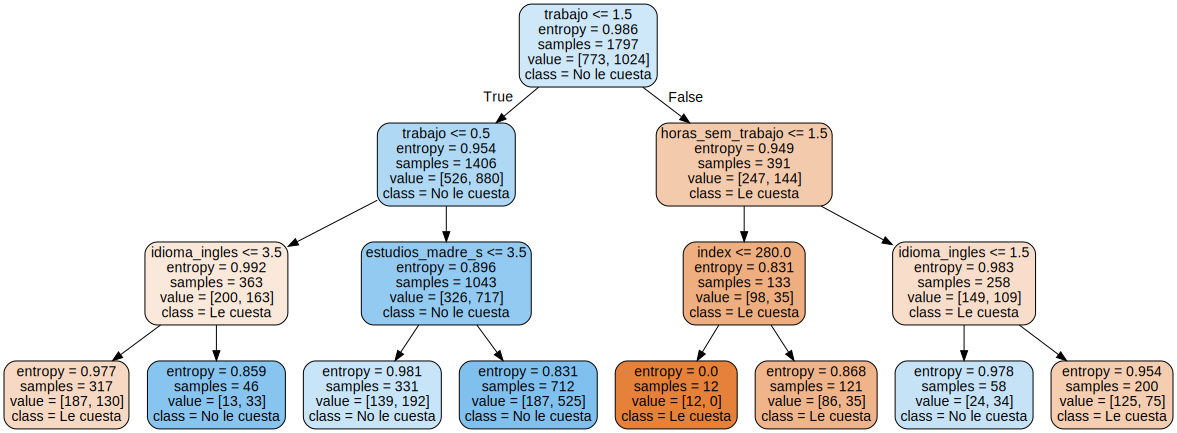

In [269]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                         feature_names=features_names,  
                         class_names=class_names,  
                         filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

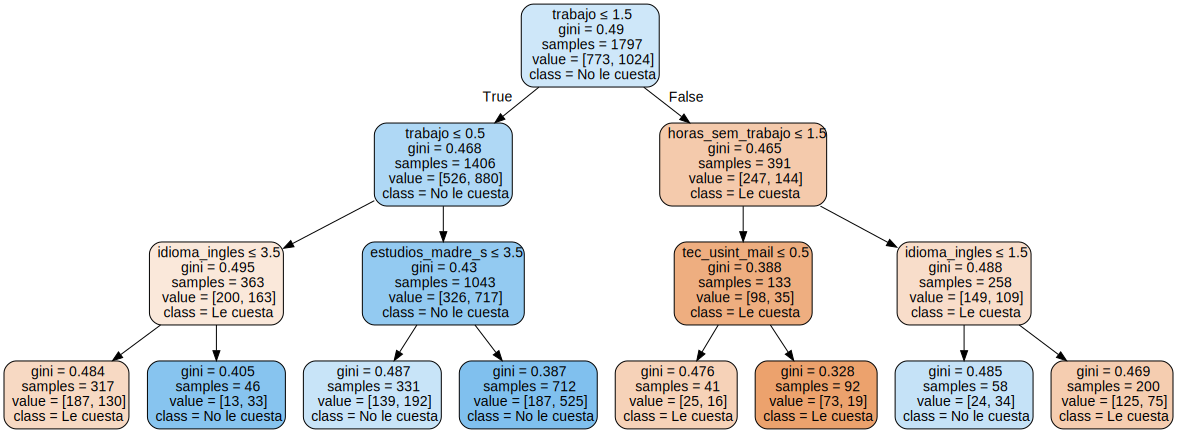

In [270]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=features_names,  
                         class_names=class_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [271]:
predictions = clf1.predict(X_train)
print ('Accuracy for training data entropy: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))
predictions = clf1.predict(X_test)
print ('Accuracy for test: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))
predictions = clf2.predict(X_train)
print ('Accuracy training data tree gini: %d ' % ((np.sum(y_train == predictions))/float(y_train.size)*100))
predictions = clf2.predict(X_test)
print ('Accuracy for test data: %d ' % ((np.sum(y_test == predictions))/float(y_test.size)*100))

Accuracy for training data entropy: 66 
Accuracy for test: 63 
Accuracy training data tree gini: 66 
Accuracy for test data: 63 


In [272]:
data.cod_carrera

0        0
1        1
2       14
3        6
4        0
        ..
2678     6
2679    16
2680    16
2681     2
2682     9
Name: cod_carrera, Length: 2683, dtype: int64

Algo que pudimos observar, es que cambiando criterios de desicion (entropy o gini) el arbol se comporta de igual manera cuando le limitamos la profundidad. De hecho, se puede ver claramente cuales
son los criterios que utilizan ambos con una profundidad de .  
Con un accuracy de 66 para training y 63 para test, el perfil de estudiante al cual no le cuesta
el cursillo de nivelacion (tomando como parametro la fecha de aprobacion del cursillo) sería:

## Caracterización del estudiante al cual no le cuesta aprobar el CINEU
No trabaja (quiza esta buscando trabajo, pero no trabaja) y la madre tiene un nivel educativo al menos secundario. Si bien el nivel de estudios de la madre no hace que al estudiante le cueste sí o sí, tenemos con muchisimo entropy (y muchisimas samples) que cuando el nivel educativo de la madre es alto, al estudiante no le cuesta.  Además, si bien es con pocas muestras, aunque el estudiante busque trabajo, si sabe ingles parece que le cuesta menos. 
Con estas features, podemos notar que es mucho mas facil predecir al estudiante que no le cuesta, ya que el arbol tiene muchas mas ramificaciones cuando al estudiante le cuesta. 

## Caracterizacion del estudiante al cual SI le cuesta
El arbol se tiene muchas mas hojas, con menos samples para los estudiantes a los cuales les cuesta.  
Esto nos da un indicio de que es mas dificil caracterizar el perfil del estudiante al cual le cuesta (lo cual tiene sentido).  
A priori, y sin hacer un analisis muy refinado, podemos notar que 
- Si esta buscando trabajo y no sabe ingles -> le cuesta
- Si trabaja -> le cuesta
- Si trabaja mas de 35 horas -> le cuesta

# Variables que mas influyen en el rendimiento del estudiante

In [204]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
#from ml.visualization import plot_confusion_matrix
#from sklearn.tree.export import export_text

#from ml.visualization import plot_confusion_matrix, plot_learning_curve
import itertools
import graphviz

In [205]:
datos = pd.read_csv('data_transf.csv',parse_dates=['fechaapro_matematica_al_21-10-2017'])

¿Cuáles son las variables que más influyen (condicionan) el mejor rendimiento del estudiante?

### Arboles de decisión - Random Forest

Usamos random forest para hacer la clasificación. Random Forest genera un ensamble de árboles en los que asigna al azar dos factores: los conjuntos de datos que usa para los distintos árboles y los atributos que evalúa en cada nivel. De esa forma reduce la varianza y aumenta la generalización del algoritmo.Para separar, elige cada vez el atributo que más información aporta (criterios: gini o entropía). Como resultado puede ordenar los atributos en una escala de importancia. Usamos eso para definir las features más importantes.

Clasificamos los estudiantes según aprueban matemática del cursillo antes de iniciarse el cuatrimestre o en los turnos posteriores, o no aprueban.

In [206]:
def grupos_cursillo(date):
    if pd.isnull(date):
        return(0)
    elif (date <= pd.to_datetime('2017-03-30')):
        return(1)
    elif (date >= pd.to_datetime('2017-03-30')):
        return (0)

In [207]:
datos.loc[datos.index, 'target'] = datos['fechaapro_matematica_al_21-10-2017'].apply(grupos_cursillo)

In [208]:
columnas_academicas = ['cantmataprob_al_21-10-2017',
                       'target',
                       'fechaapro_matematica_al_21-10-2017',
                       'promedio_con_aplaz_al_21-10-2017',
                       'promedio_sin_aplaz_al_21-10-2017',
                       'nota_matematica',
                       'matcursprisem']

columnas_se1= [        'sexo',
                       'madre_vive',
                       'padre_vive',
                       'viven_lejos',
                       'vive_Con familia de origen',
                       'vive_Con su pareja/hijos',
                       'vive_Otros', 
                       'vive_Solo',
                       'solterx',
                       'tiene_hijos', 
                       'dep_practica',   
                       'si_beca',
                       'idioma_ingles',
                       'otros_idms',
                       'estudios_padre', 
                       'estudios_madre', 
                       'OS_Carece de Obra Social',
                       'OS_Como afiliado voluntario', 
                       'OS_Otorgada por la universidad',
                       'OS_Por ser familiar a cargo',
                       'OS_Por su trabajo']

col_otras=[            'cod_carrera'
                       'estudios_padre_s'        
                       'estudios_madre_s'] 
            
columnas_tec = [       'tec_int_casa',
                       'tec_int_cyber',
                       'tec_int_otro',
                       'tec_int_trab',
                       'tec_int_univ',
                       'tec_pc_casa', 
                       'tec_pc_otro',
                       'tec_pc_trab', 
                       'tec_pc_univ', 
                       'tec_usint_cap',
                       'tec_usint_cha',
                       'tec_usint_est',
                       'tec_usint_mail',
                       'tec_usint_per',
                       'tec_int_reg_ordinal']

columnas_se2     = [   'alm_NoTr_B',
                       'alm_NoTr_NoB', 
                       'alm_Tr', 
                       'madre_Desconoce',
                       'madre_NoTr_B',   
                       'madre_NoTr_NoB',
                       'madre_Tr', 
                       'padre_Desconoce',
                       'padre_NoTr_B',
                       'padre_NoTr_NoB', 
                       'padre_Tr',   
                       'horas_trab_ordinal'] 

columnas_bin = [
                       'alm_0 horas',
                       'alm_35 o mas horas',
                       'alm_Hasta 10 horas',        
                       'alm_Mas de 10 y hasta 20 horas',     
                       'alm_Mas de 20 y menos de 35 horas',        
                       'niv_ingles_0', 
                       'niv_ingles_1',  
                       'niv_ingles_2',      
                       'niv_otroidm_0',    
                       'niv_otroidm_1',     
                       'niv_otroidm_2',    
                       'niv_est_madre_0', 
                       'niv_est_madre_1',   
                       'niv_est_madre_2', 
                       'niv_est_madre_3',     
                       'niv_est_madre_4',    
                       'niv_est_padre_0',        
                       'niv_est_padre_1',       
                       'niv_est_padre_2',           
                       'niv_est_padre_3',         
                       'niv_est_padre_4',
                       'Accede a Internet Solo algunas veces por mes',
                       'Accede a Internet Solo algunas veces por semana',
                       'Accede a Internet Todos los días',
                       'Nunca Accede a Internet'   
] 

### Selección xy

In [209]:
cod_total = datos.cod_carrera.unique()
cod_ing = cod_total[(cod_total != 0) & (cod_total != 1) & (cod_total != 2) &
                    (cod_total != 15) & (cod_total != 16)]
cols=columnas_academicas+columnas_bin+['estudios_madre_s','estudios_padre_s']

In [210]:
def selxy(data, ysel, cols):
    if ysel=='nota':
        y=data.nota_matematica
    if ysel=='fecha':
        y= data.target
    x=data.drop(columns=cols,axis=1)
    X_train, x_test, Y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=3)   
    return(X_train, x_test, Y_train, y_test)

### Segmentación

In [211]:
def seldatos(dfori, crit):
    dfnew = dfori.loc[ dfori.cod_carrera.isin(crit) ]
    return(dfnew)

### Matriz de Confusión

In [212]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Etiqueta verdadera', size = 18)
    plt.xlabel('Etiqueta predicha', size = 18)

#### Random Forest (línea de base)

In [213]:
def rfsinopt(X_train, Y_train, x_test, y_test, etiquetas):
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, Y_train)
    clf_params = clf.get_params
    display(clf_params)
    y_pred = clf.predict(x_test)
    y_probs = clf.predict_proba(x_test)[:, 1]
    roc_value = roc_auc_score(y_test, y_probs)
    print('ROC_AUC para RF sin optimizar es:', roc_value,'\n\n')
    c_matrix = confusion_matrix(y_test, y_pred)
    #plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')

    plot_confusion_matrix(c_matrix,
                          classes=etiquetas, title="Matriz de confusión para RF sin optimizar")
    print( 'Métricas RF sin optimizar:\n', classification_report(y_test, y_pred), end="\n\n")
    feat_imp = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
    print('Importancia de las features, RF sin optimizar \n', feat_imp)
    return() 

### Optimización

#### random search

In [214]:
def buscar_random(X_val, Y_val, feature_labels):
    # nro de árboles
    n_estimators = [int(x) for x in np.linspace(start = 10, stop = 510, num = 25)]
    # nro de features para agrupar
    max_features = ['log2', 'sqrt']
    # max nro de niveles del árbol
    max_depth = [int(x) for x in np.linspace(5, 105, num = 10)]
    max_depth.append(None)
    max_leaf_nodes = [5, 10, 100, None]
    # min nro de muestras para separar el nodo
    min_samples_split = [2, 10, 50]
    # min nro de muestras por hoja
    min_samples_leaf = [1, 2, 10, 20]
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'max_leaf_nodes' : max_leaf_nodes,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
                          
    clf_rf = RandomForestClassifier(random_state=0)
    rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, 
                                   n_iter = 100, verbose=2, random_state=0, 
                                   n_jobs = -1, scoring='roc_auc', iid=False)
    #scoring='accuracy', 'precision', 'roc_auc'
    rf_random.fit(X_val, Y_val)
    rf_random.best_params_
    best_rf_random_clf = rf_random.best_estimator_
    print('Mejor métrica para entrenamiento: ', rf_random.best_score_)
    print(best_rf_random_clf)
    feat_imp = pd.DataFrame({'feature': feature_labels, 
                   'importance': best_rf_random_clf.feature_importances_}).\
                    sort_values('importance', ascending = False)
    #feat_imp
    return(best_rf_random_clf, feat_imp)

In [215]:
def metricas(clasif, x_val, y_val, etiquetas):
    clf_rf_b = clasif #best_rf_random_clf
    y_predicho = clasif.predict(x_val) # clf_rf_b.predict(x_test)
    y_probab = clasif.predict_proba(x_val)[:,1] #clf_rf_b.predict_proba(x_test)[:, 1]
    roc_value = roc_auc_score(y_val, y_probab)
    roc_value
    c_matrix = confusion_matrix(y_val, y_predicho)
    plt.figure(figsize=(14, 4), dpi= 80, facecolor='w', edgecolor='k')
    
    plot_confusion_matrix(c_matrix,
                              classes=etiquetas, title="Matriz de confusión para RF")
    print(classification_report(y_val, y_predicho), end="\n\n")
    return()

### Separación en train y test y segmentación.

In [216]:
X_train, x_test, Y_train, y_test = selxy(datos, 'nota', cols)

X_train_ing = seldatos(X_train, cod_ing ).drop(columns=['cod_carrera'],axis=1)
X_train_noing = seldatos(X_train, [0, 1, 2, 15, 16]).drop(columns=['cod_carrera'],axis=1)

x_test_ing = seldatos(x_test, cod_ing ).drop(columns=['cod_carrera'],axis=1)
x_test_noing = seldatos(x_test, [0, 1, 2, 15, 16]).drop(columns=['cod_carrera'],axis=1)

Y_train_ing = Y_train.loc[X_train_ing.index]
Y_train_noing = Y_train.loc[X_train_noing.index]

y_test_ing = y_test.loc[x_test_ing.index]
y_test_noing = y_test.loc[x_test_noing.index]

X_train = X_train.drop(columns=['cod_carrera'],axis=1)
x_test = x_test.drop(columns=['cod_carrera'],axis=1)

#### RF sin optimizar

/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>

ROC_AUC para RF sin optimizar es: 0.7682590427475339 


Confusion matrix, without normalization
Métricas RF sin optimizar:
               precision    recall  f1-score   support

           0       0.65      0.62      0.64       280
           1       0.74      0.76      0.75       391

   micro avg       0.70      0.70      0.70       671
   macro avg       0.70      0.69      0.69       671
weighted avg       0.70      0.70      0.70       671


Importancia de las features, RF sin optimizar 
                            feature  importance
35                  estudios_madre    0.087778
34                  estudios_padre    0.085124
20                    alm_NoTr_NoB    0.041084
3                     dep_practica    0.040048
32                   idioma_ingles    0.036697
33                      otros_idms    0.034500
0                             sexo    0.030626
16                  tec_usint_mail    0.030612
41                     viven_lejos    0.030020
6                     tec_int_

()

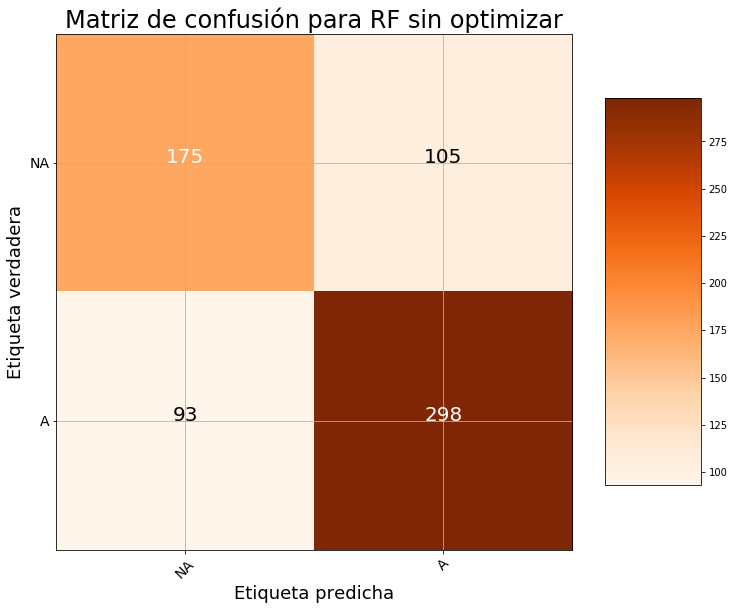

In [217]:
rfsinopt(X_train, Y_train, x_test, y_test,['NA','A'])

#### RF optimizados -  todxs lxs alumnxs

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   40.3s finished


Mejor métrica para entrenamiento:  0.780895196196583
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=49, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=489, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.76      0.61      0.68       280
           1       0.76      0.86      0.81       391

   micro avg       0.76      0.76      0.76       671
   macro avg       0.76      0.74      0.74       671
weighted avg       0.76      0.76      0.75       671




,feature,importance
35,estudios_madre,0.090420
34,estudios_padre,0.088405
20,alm_NoTr_NoB,0.040154
32,idioma_ingles,0.037700
33,otros_idms,0.033058
3,dep_practica,0.032980
0,sexo,0.029708
41,viven_lejos,0.029350
14,tec_usint_cha,0.028898
15,tec_usint_est,0.025946


<Figure size 1120x320 with 0 Axes>

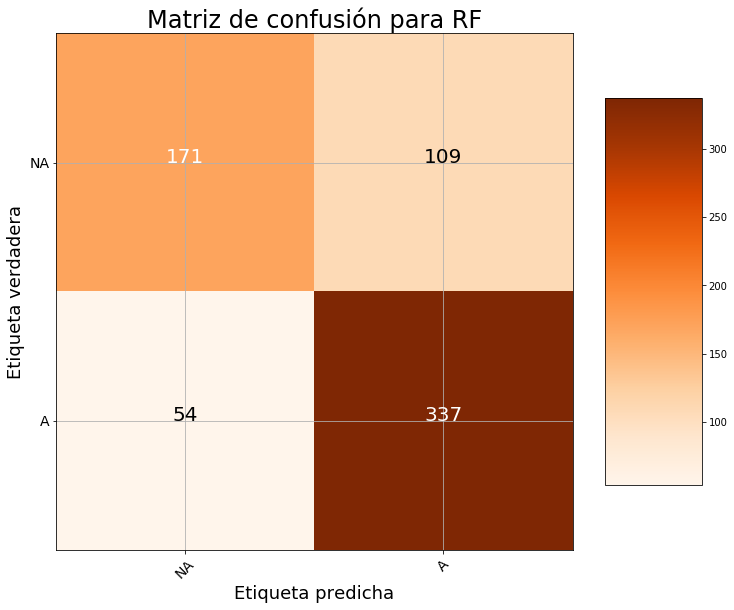

In [218]:
feature_labels = list(X_train.columns)
clasif, df_feat_all = buscar_random(X_train, Y_train, feature_labels)
metricas(clasif, x_test, y_test, ['NA','A'])
df_feat_all

#### RF optimizado - ingenierias

/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   26.7s finished


Mejor métrica para entrenamiento:  0.7717363846425277
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=49, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=489, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.79      0.48      0.59       176
           1       0.78      0.93      0.85       344

   micro avg       0.78      0.78      0.78       520
   macro avg       0.78      0.71      0.72       520
weighted avg       0.78      0.78      0.76       520




,feature,importance
35,estudios_madre,0.092956
34,estudios_padre,0.089945
32,idioma_ingles,0.040480
33,otros_idms,0.034469
3,dep_practica,0.034141
20,alm_NoTr_NoB,0.030811
41,viven_lejos,0.029656
14,tec_usint_cha,0.028832
0,sexo,0.028090
15,tec_usint_est,0.026487


<Figure size 1120x320 with 0 Axes>

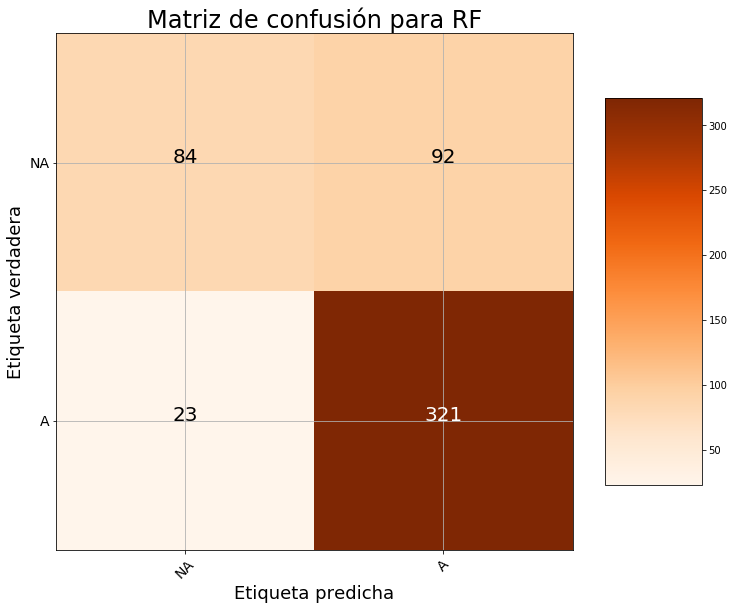

In [219]:
feature_labels = list(X_train.columns)
clasif, df_feat_ing = buscar_random(X_train_ing, Y_train_ing, feature_labels)
metricas(clasif, x_test_ing, y_test_ing, ['NA','A'])
df_feat_ing

#### RF optimizado - no ingenierías

/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.3s finished


Mejor métrica para entrenamiento:  0.7650406876527774
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=60, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=343, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       104
           1       0.68      0.49      0.57        47

   micro avg       0.77      0.77      0.77       151
   macro avg       0.74      0.69      0.70       151
weighted avg       0.76      0.77      0.76       151




,feature,importance
35,estudios_madre,0.087633
34,estudios_padre,0.078904
20,alm_NoTr_NoB,0.047714
32,idioma_ingles,0.036525
39,OS_Por ser familiar a cargo,0.035293
0,sexo,0.033026
33,otros_idms,0.031139
21,alm_Tr,0.029174
3,dep_practica,0.028982
14,tec_usint_cha,0.028875


<Figure size 1120x320 with 0 Axes>

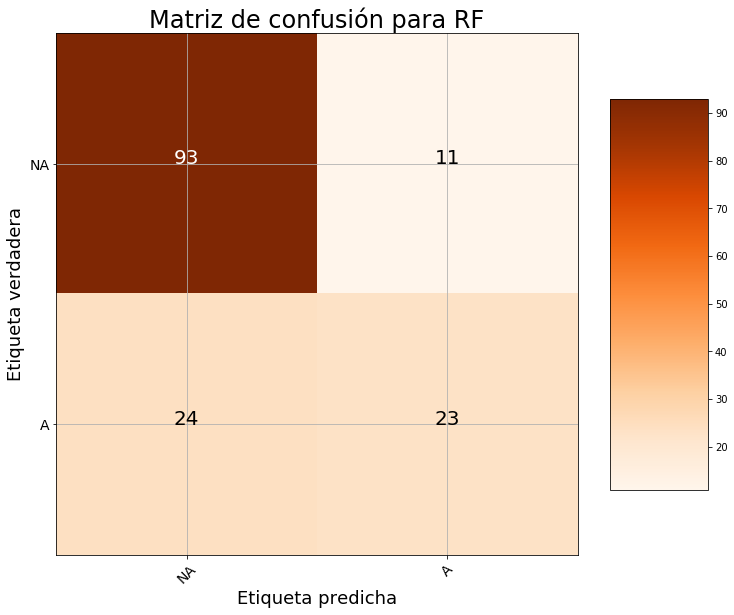

In [220]:
feature_labels = list(X_train.columns)
clasif, df_feat_noing = buscar_random(X_train_noing, Y_train_noing, feature_labels)
metricas(clasif, x_test_noing, y_test_noing, ['NA','A'] )
df_feat_noing

### Arboles de decisión con las features más importantes
Construimos árboles de decisión usando solo las 10 features más importantes identificadas antes para identificar cómo separan las features al conjunto de estudiantes. 

In [221]:
feat_imp_all = df_feat_all.head(10) #loc[0:10] #.importance #df_feat_all.importance[0:10]]
display(feat_imp_all)
feat_imp_ing = df_feat_ing.head(10) #loc[df_feat_ing.importance > 0.025]
display(feat_imp_ing)
feat_imp_noing = df_feat_noing.head(10) #.loc[df_feat_noing.importance > 0.025]
display(feat_imp_noing)

,feature,importance
35,estudios_madre,0.090420
34,estudios_padre,0.088405
20,alm_NoTr_NoB,0.040154
32,idioma_ingles,0.037700
33,otros_idms,0.033058
3,dep_practica,0.032980
0,sexo,0.029708
41,viven_lejos,0.029350
14,tec_usint_cha,0.028898
15,tec_usint_est,0.025946


,feature,importance
35,estudios_madre,0.092956
34,estudios_padre,0.089945
32,idioma_ingles,0.040480
33,otros_idms,0.034469
3,dep_practica,0.034141
20,alm_NoTr_NoB,0.030811
41,viven_lejos,0.029656
14,tec_usint_cha,0.028832
0,sexo,0.028090
15,tec_usint_est,0.026487


,feature,importance
35,estudios_madre,0.087633
34,estudios_padre,0.078904
20,alm_NoTr_NoB,0.047714
32,idioma_ingles,0.036525
39,OS_Por ser familiar a cargo,0.035293
0,sexo,0.033026
33,otros_idms,0.031139
21,alm_Tr,0.029174
3,dep_practica,0.028982
14,tec_usint_cha,0.028875


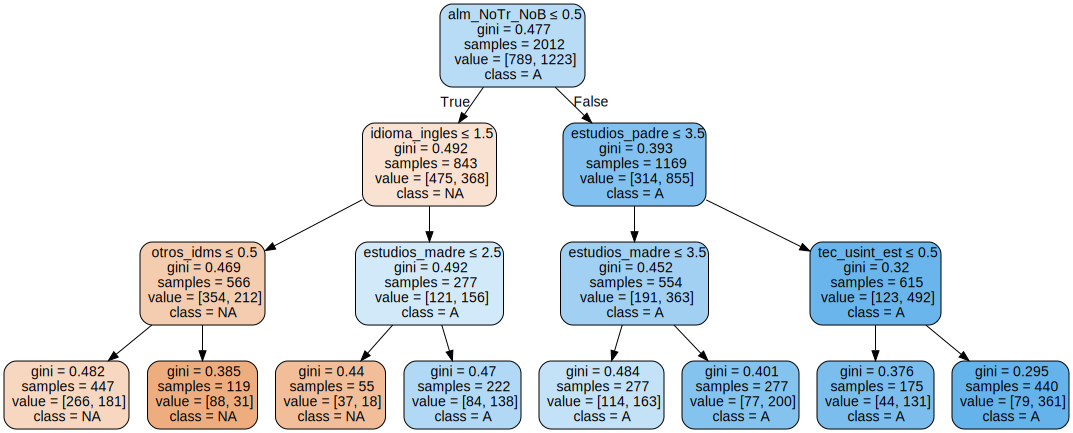

              precision    recall  f1-score   support

           0       0.65      0.43      0.52       280
           1       0.67      0.83      0.74       391

   micro avg       0.66      0.66      0.66       671
   macro avg       0.66      0.63      0.63       671
weighted avg       0.66      0.66      0.65       671




In [222]:
X_trainall_sel = X_train[list(feat_imp_all.feature.values)]
x_testall_sel = x_test[list(feat_imp_all.feature.values)]
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)
clf = clf.fit(X_trainall_sel, Y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(feat_imp_all.feature.values),  
                         class_names=['NA','A'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
y_pred = clf.predict(x_testall_sel)
print(classification_report(y_test, y_pred), end="\n\n")

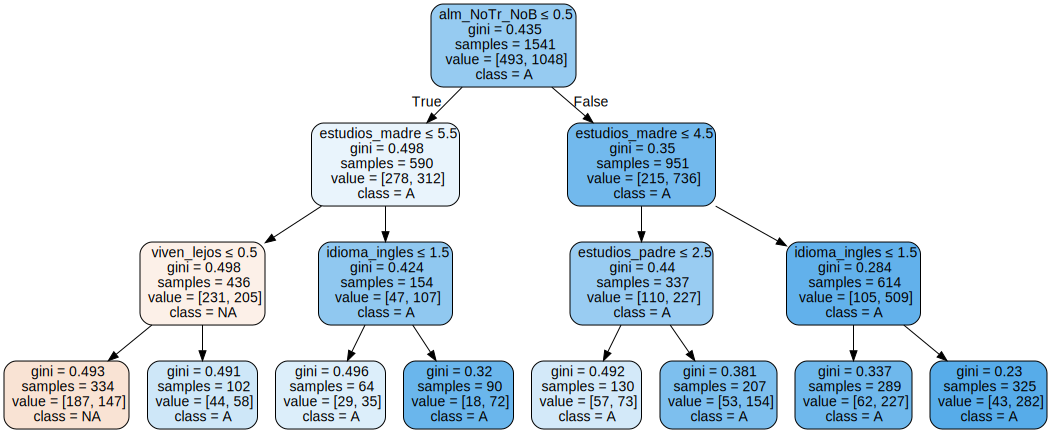

              precision    recall  f1-score   support

           0       0.61      0.34      0.43       176
           1       0.72      0.89      0.80       344

   micro avg       0.70      0.70      0.70       520
   macro avg       0.67      0.61      0.62       520
weighted avg       0.68      0.70      0.67       520




In [223]:
X_training_sel = X_train_ing[list(feat_imp_ing.feature.values)]
x_testing_sel = x_test_ing[list(feat_imp_ing.feature.values)]
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)
clf = clf.fit(X_training_sel, Y_train_ing)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(feat_imp_ing.feature.values),  
                         class_names=['NA','A'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
y_pred = clf.predict(x_testing_sel)
print(classification_report(y_test_ing, y_pred), end="\n\n")

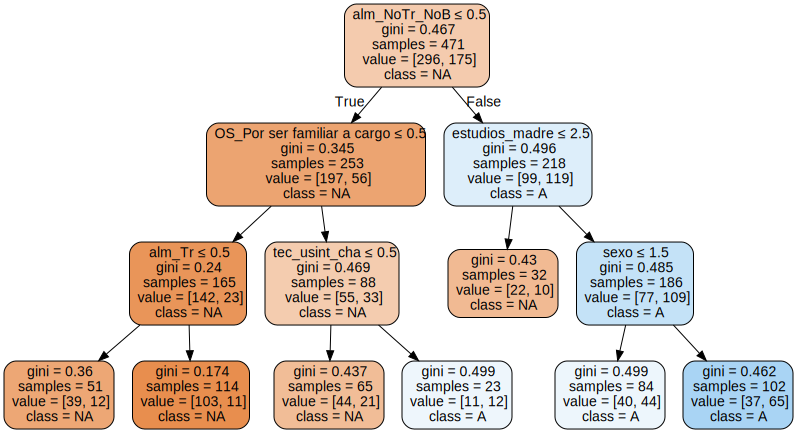

              precision    recall  f1-score   support

           0       0.79      0.63      0.70       104
           1       0.43      0.62      0.51        47

   micro avg       0.63      0.63      0.63       151
   macro avg       0.61      0.63      0.61       151
weighted avg       0.68      0.63      0.64       151




In [224]:
X_trainnoing_sel = X_train_noing[list(feat_imp_noing.feature.values)]
x_testnoing_sel = x_test_noing[list(feat_imp_noing.feature.values)]
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)
clf = clf.fit(X_trainnoing_sel, Y_train_noing)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(feat_imp_noing.feature.values),  
                         class_names=['NA','A'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
y_pred = clf.predict(x_testnoing_sel)
print(classification_report(y_test_noing, y_pred), end="\n\n")

### VARIABLE Y = fecha de aprobación.

Repetimos el análisis pero usando como variable para discriminar el desempeño en matemática, separamos los alumnos que aprueban antes de que comience el cuatrimestre, y los que aprueban en los turnos posteriores o no aprueban.

In [225]:
X_train, x_test, Y_train, y_test = selxy(datos, 'fecha', cols)

X_train_ing = seldatos(X_train, cod_ing ).drop(columns=['cod_carrera'],axis=1)
X_train_noing = seldatos(X_train, [0, 1, 2, 15, 16]).drop(columns=['cod_carrera'],axis=1)

x_test_ing = seldatos(x_test, cod_ing ).drop(columns=['cod_carrera'],axis=1)
x_test_noing = seldatos(x_test, [0, 1, 2, 15, 16]).drop(columns=['cod_carrera'],axis=1)

Y_train_ing = Y_train.loc[X_train_ing.index]
Y_train_noing = Y_train.loc[X_train_noing.index]

y_test_ing = y_test.loc[x_test_ing.index]
y_test_noing = y_test.loc[x_test_noing.index]

X_train = X_train.drop(columns=['cod_carrera'],axis=1)
x_test = x_test.drop(columns=['cod_carrera'],axis=1)

/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)>

ROC_AUC para RF sin optimizar es: 0.74794116589348 


Confusion matrix, without normalization
Métricas RF sin optimizar:
               precision    recall  f1-score   support

           0       0.63      0.66      0.64       299
           1       0.71      0.69      0.70       372

   micro avg       0.67      0.67      0.67       671
   macro avg       0.67      0.67      0.67       671
weighted avg       0.68      0.67      0.67       671


Importancia de las features, RF sin optimizar 
                            feature  importance
35                  estudios_madre    0.092975
34                  estudios_padre    0.090194
32                   idioma_ingles    0.037394
20                    alm_NoTr_NoB    0.035037
3                     dep_practica    0.034485
33                      otros_idms    0.030734
0                             sexo    0.029054
14                   tec_usint_cha    0.028726
18             tec_int_reg_ordinal    0.027823
41                     viven_lej

()

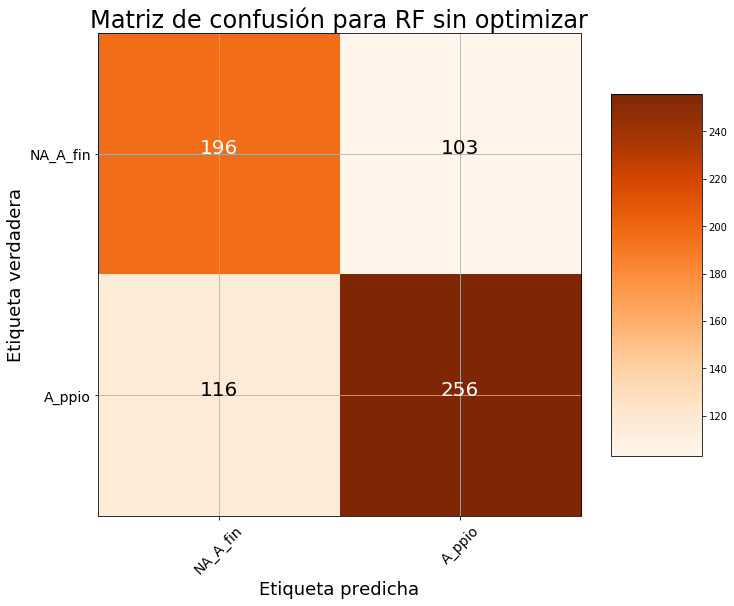

In [226]:
rfsinopt(X_train, Y_train, x_test, y_test, ['NA_A_fin', 'A_ppio'])

/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   40.6s finished


Mejor métrica para entrenamiento:  0.7562080506643903
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=27, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=447, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       299
           1       0.72      0.79      0.76       372

   micro avg       0.72      0.72      0.72       671
   macro avg       0.71      0.71      0.71       671
weighted avg       0.71      0.72      0.71       671




,feature,importance
34,estudios_padre,0.092878
35,estudios_madre,0.091384
32,idioma_ingles,0.039349
20,alm_NoTr_NoB,0.035442
33,otros_idms,0.033606
3,dep_practica,0.032899
0,sexo,0.030076
14,tec_usint_cha,0.029140
41,viven_lejos,0.028712
15,tec_usint_est,0.027060


<Figure size 1120x320 with 0 Axes>

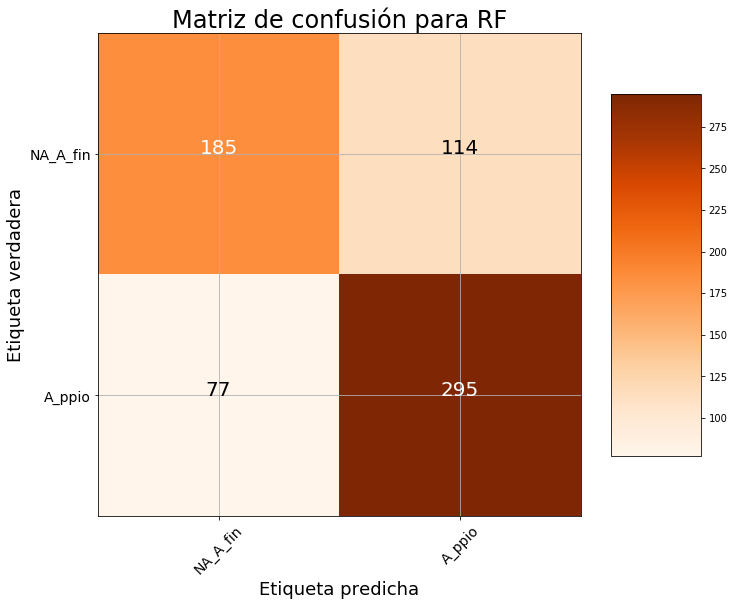

In [227]:
feature_labels = list(X_train.columns)
clasif, df_feat_all = buscar_random(X_train, Y_train, feature_labels)
metricas(clasif, x_test, y_test, ['NA_A_fin', 'A_ppio'])
df_feat_all

/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   27.1s finished


Mejor métrica para entrenamiento:  0.749012066221459
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=27, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=447, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.71      0.47      0.57       191
           1       0.74      0.89      0.81       329

   micro avg       0.73      0.73      0.73       520
   macro avg       0.73      0.68      0.69       520
weighted avg       0.73      0.73      0.72       520




,feature,importance
34,estudios_padre,0.094406
35,estudios_madre,0.092751
32,idioma_ingles,0.041425
33,otros_idms,0.034764
3,dep_practica,0.033270
20,alm_NoTr_NoB,0.029905
14,tec_usint_cha,0.029343
0,sexo,0.029145
41,viven_lejos,0.028966
18,tec_int_reg_ordinal,0.028532


<Figure size 1120x320 with 0 Axes>

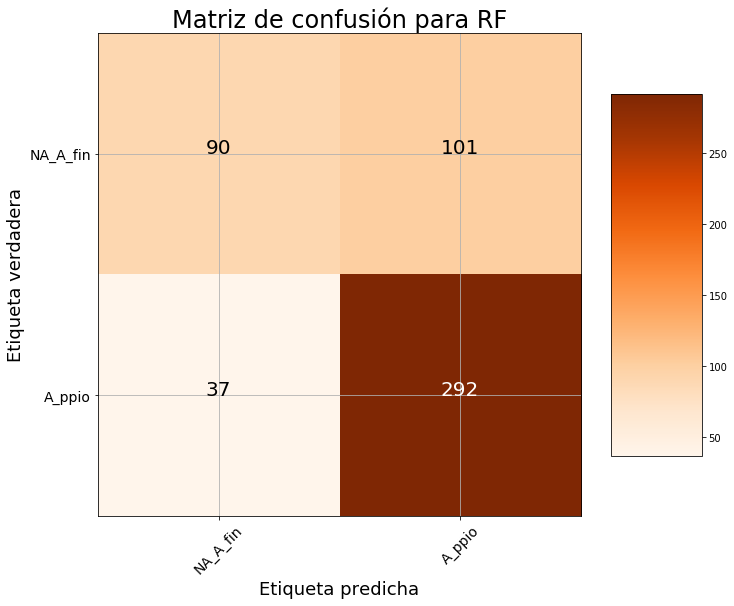

In [228]:
feature_labels = list(X_train.columns)
clasif, df_feat_ing = buscar_random(X_train_ing, Y_train_ing, feature_labels)
metricas(clasif, x_test_ing, y_test_ing, ['NA_A_fin', 'A_ppio'])
df_feat_ing

/home/carla/anaconda3/envs/diplodatos/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.9s finished


Mejor métrica para entrenamiento:  0.7400677406721572
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=27, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=447, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       108
           1       0.56      0.35      0.43        43

   micro avg       0.74      0.74      0.74       151
   macro avg       0.66      0.62      0.63       151
weighted avg       0.71      0.74      0.71       151




,feature,importance
35,estudios_madre,0.089911
34,estudios_padre,0.080961
20,alm_NoTr_NoB,0.038378
32,idioma_ingles,0.036058
39,OS_Por ser familiar a cargo,0.033629
0,sexo,0.032734
3,dep_practica,0.031287
33,otros_idms,0.031272
14,tec_usint_cha,0.028949
16,tec_usint_mail,0.028373


<Figure size 1120x320 with 0 Axes>

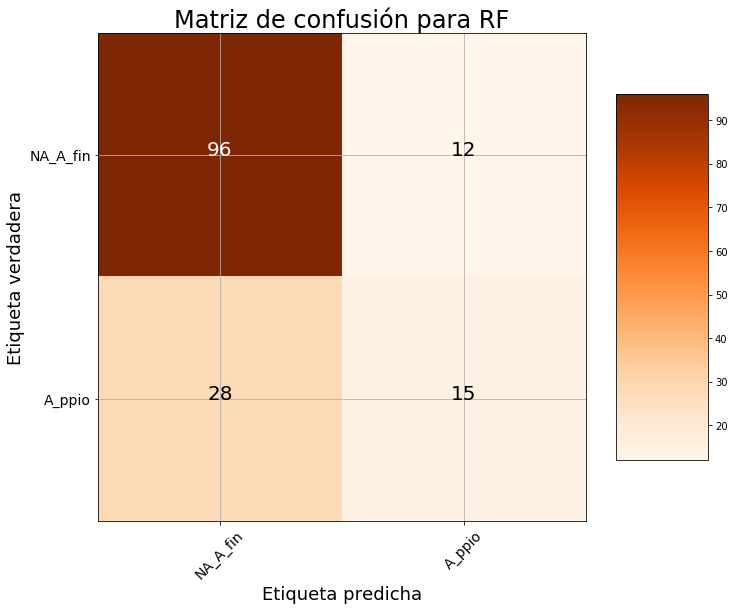

In [229]:
feature_labels = list(X_train.columns)
clasif, df_feat_noing = buscar_random(X_train_noing, Y_train_noing, feature_labels)
metricas(clasif, x_test_noing, y_test_noing, ['NA_A_fin', 'A_ppio'] )
df_feat_noing

In [230]:
feat_imp_all = df_feat_all.head(10) #loc[0:10] #.importance #df_feat_all.importance[0:10]]
display(feat_imp_all)
feat_imp_ing = df_feat_ing.head(10) #loc[df_feat_ing.importance > 0.025]
display(feat_imp_ing)
feat_imp_noing = df_feat_noing.head(10) #.loc[df_feat_noing.importance > 0.025]
display(feat_imp_noing)

,feature,importance
34,estudios_padre,0.092878
35,estudios_madre,0.091384
32,idioma_ingles,0.039349
20,alm_NoTr_NoB,0.035442
33,otros_idms,0.033606
3,dep_practica,0.032899
0,sexo,0.030076
14,tec_usint_cha,0.029140
41,viven_lejos,0.028712
15,tec_usint_est,0.027060


,feature,importance
34,estudios_padre,0.094406
35,estudios_madre,0.092751
32,idioma_ingles,0.041425
33,otros_idms,0.034764
3,dep_practica,0.033270
20,alm_NoTr_NoB,0.029905
14,tec_usint_cha,0.029343
0,sexo,0.029145
41,viven_lejos,0.028966
18,tec_int_reg_ordinal,0.028532


,feature,importance
35,estudios_madre,0.089911
34,estudios_padre,0.080961
20,alm_NoTr_NoB,0.038378
32,idioma_ingles,0.036058
39,OS_Por ser familiar a cargo,0.033629
0,sexo,0.032734
3,dep_practica,0.031287
33,otros_idms,0.031272
14,tec_usint_cha,0.028949
16,tec_usint_mail,0.028373


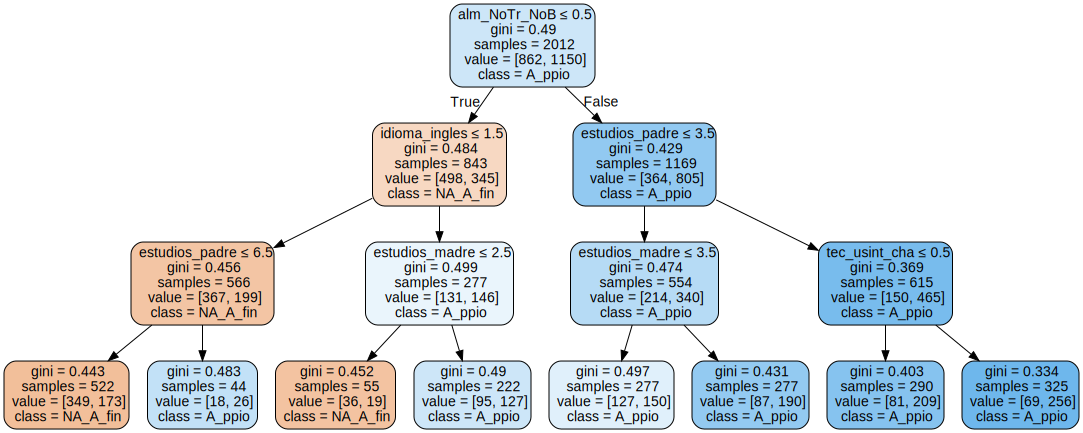

              precision    recall  f1-score   support

           0       0.67      0.38      0.49       299
           1       0.63      0.85      0.72       372

   micro avg       0.64      0.64      0.64       671
   macro avg       0.65      0.61      0.60       671
weighted avg       0.65      0.64      0.62       671




In [231]:
X_trainall_sel = X_train[list(feat_imp_all.feature.values)]
x_testall_sel = x_test[list(feat_imp_all.feature.values)]
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)
clf = clf.fit(X_trainall_sel, Y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(feat_imp_all.feature.values),  
                         class_names=['NA_A_fin', 'A_ppio'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
y_pred = clf.predict(x_testall_sel)
print(classification_report(y_test, y_pred), end="\n\n")

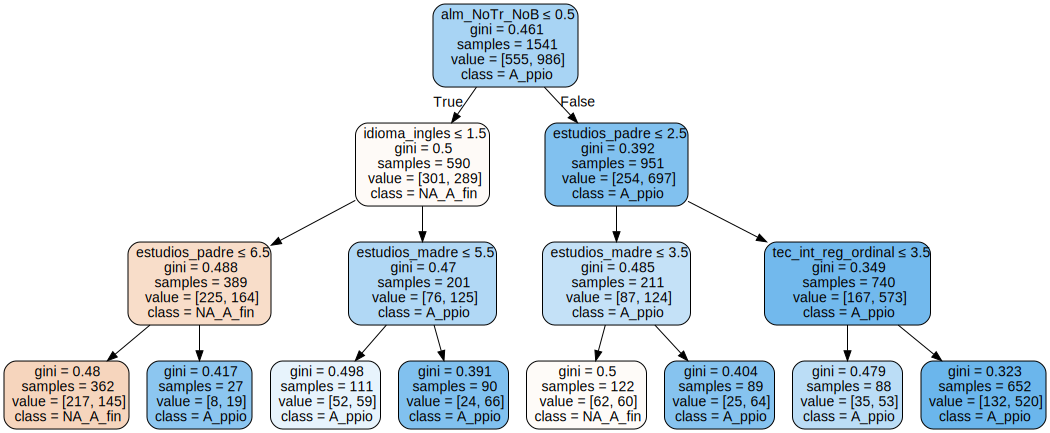

              precision    recall  f1-score   support

           0       0.56      0.46      0.50       191
           1       0.71      0.79      0.75       329

   micro avg       0.67      0.67      0.67       520
   macro avg       0.64      0.62      0.63       520
weighted avg       0.66      0.67      0.66       520




In [232]:
X_training_sel = X_train_ing[list(feat_imp_ing.feature.values)]
x_testing_sel = x_test_ing[list(feat_imp_ing.feature.values)]
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)
clf = clf.fit(X_training_sel, Y_train_ing)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(feat_imp_ing.feature.values),  
                         class_names=['NA_A_fin', 'A_ppio'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
y_pred = clf.predict(x_testing_sel)
print(classification_report(y_test_ing, y_pred), end="\n\n")

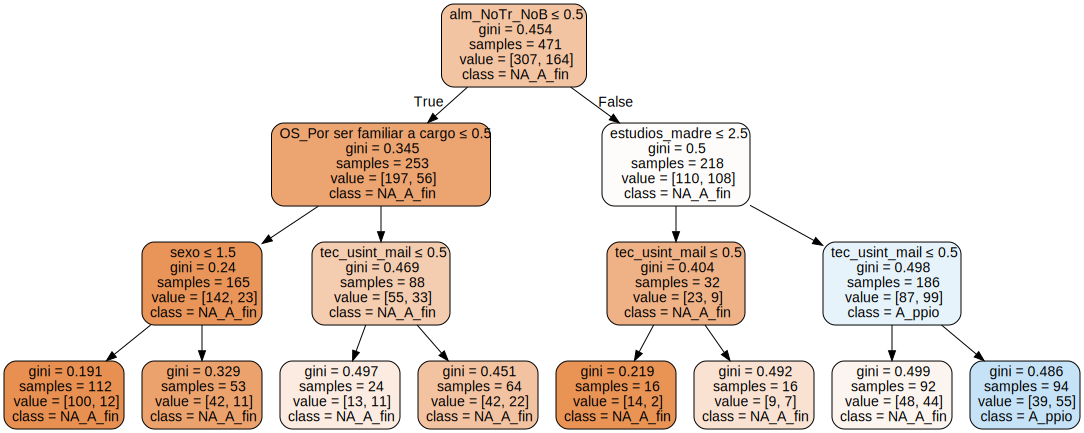

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       108
           1       0.44      0.42      0.43        43

   micro avg       0.68      0.68      0.68       151
   macro avg       0.61      0.60      0.60       151
weighted avg       0.68      0.68      0.68       151




In [233]:
X_trainnoing_sel = X_train_noing[list(feat_imp_noing.feature.values)]
x_testnoing_sel = x_test_noing[list(feat_imp_noing.feature.values)]
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=15)
clf = clf.fit(X_trainnoing_sel, Y_train_noing)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(feat_imp_noing.feature.values),  
                         class_names=['NA_A_fin', 'A_ppio'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)
y_pred = clf.predict(x_testnoing_sel)
print(classification_report(y_test_noing, y_pred), end="\n\n")

### Conclusiones

#### Métricas:

- Probamos con distintas métricas para optimizar la clasificación de manera global (considerando la clasificación sobre todas las categorías). En el total de alumnos, el error más frecuente es que clasifica los que no aprueban (NA) como si aprobaran (A)(falsos positivos). Optimizamos el random forest (con randomized search) usando como métricas la precisión, el recall (con las categorías tal como son originalmete e invirtiendolas: NA -> A y A -> NA), y el ROC. La métrica con la que se logra la mejor clasificación, considerando la mejora sobre la clasificación de ambas clases es ROC. Esa es la que usamos.

#### Features más importantes:

- Separamos lxs alumnxs de ingeniería y las carreras que no son ingenierías, y comparamos los dos grupos con el total de los alumnxs. Las 10 variables que aparecen como más informativas para clasificar en los tres conjuntos son:

    -Estudios Padre
    
    -Estudios Madre
    
    -No Trabaja no Busca Trabajo
    
    -Idioma Inglés
    
    -Otros Idiomas
    
    -Practica Deportes
    
    -Viven Lejos (en todxs los estudiantes e ingenierías) 
    
    -Sexo
    
    -Usa internet para chatear
    
    -Y la otra feature difiere en los tres grupos: es "usa internet para estudiar" en el grupo de todxs los estudiantes; "usa internet para el mail" para las ingenierías; "Trabaja" y "Obra Social por grupo familiar" para las carreras que no son ingenierías.
    
- Las features más discriminativas son similares entre los distintos grupos de carreras. Sin embargo, hay más estudiantes que no aprueban matemáticas entre los alumnxs que no son de las ingenierías. 

- Generamos árboles cortos (3 estratos) con las 10 features principales, para ver como operan las decisiones. En todos los árboles la característica que corta primero es si el "estudiante no trabaja ni busca trabajo". Entre los estudiantes que no trabajan ni buscan trabajo, el nivel de estudios de la madre y del padre (salvo este último en las no ingenierías) separan en grupos con distinta probabilidad de aprobar. En el grupo de estudiantes que trabaja o busca trabajo hay diferencias entre las ingenierías y no ingenierías. En ingenierías también aparece el nivel de estudios de la madre como discriminante, junto con características como nivel de inglés y si viven lejos de su casa familiar. En las no ingenierías aparecen como importante si la obra social es por grupo familiar y si lxs alumnxs efectivamente trabajan (o buscan trabajo), y si usan internet para chatear. Cuando se toma el total de alumnos, en el grupo que busca trabajo o trabaja aparecen como más discriminantes, el nivel de estudios de la madre y el nivel de idiomas.

- Es muy similar el resultado usando la fecha en la que aprueban matemática del cursillo como variable dependiente

En las ingenierías son más lxs que aprueban que lxs que no aprueban. En cambio en las otras carreras es al revés

In [238]:
def clas_ingnoing(v):
    if v in cod_ing:
        return(0)
    if v in [0, 1, 2, 15, 16]:
        return(1)

In [241]:
datos['ingnoing'] = datos.cod_carrera.apply(clas_ingnoing)

In [248]:
import seaborn as sns

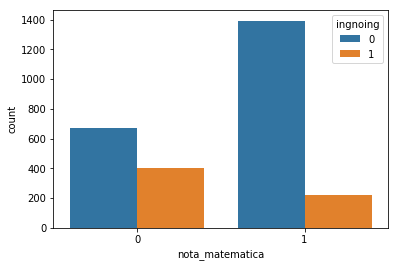

In [250]:
ax = sns.countplot(x="nota_matematica", hue="ingnoing", data=datos)

En las ingenierías también son más lxs que No trabajan ni buscan trabajo. En cambio en las otras carreras es al revés

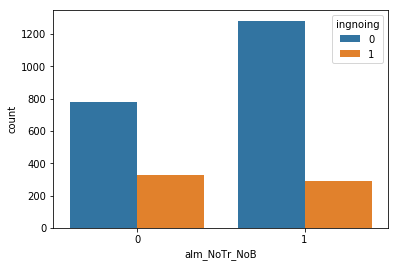

In [251]:
ax = sns.countplot(x="alm_NoTr_NoB", hue="ingnoing", data=datos)

## ¿Existe una interdependencia significativa entre el rendimiento en matemática y el desempeño para el primer cuatrimestre de la carrera? 


En el gráfico de materias cursadas en el primer semestre vs la nota de matemática se ve que los que no aprueban cursan solo una y los otros en promedio cerca de cuatro. Entonces matemática es correlativa de casi todas las materias. Si medimos desempeño en función de las materias cursadas claramente nos va a dar una interdependencia.

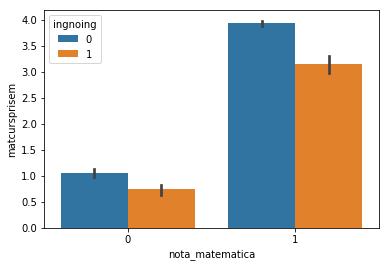

In [259]:
ax = sns.barplot(x="nota_matematica", y="matcursprisem", hue='ingnoing', data=datos)

In [ ]:
'cantmataprob_al_21-10-2017',
                       'target',
                       'fechaapro_matematica_al_21-10-2017',
                       'promedio_con_aplaz_al_21-10-2017',
                       'promedio_sin_aplaz_al_21-10-2017',
                       'nota_matematica',
                       'matcursprisem'

Lógicamente se ve la misma diferencia en cantidad de materias aprobadas al 21 de octubre

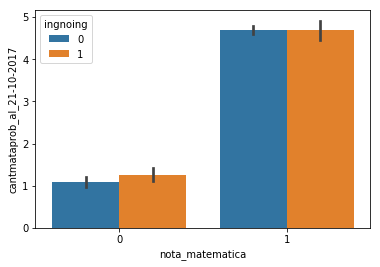

In [260]:
ax = sns.barplot(x="nota_matematica", y='cantmataprob_al_21-10-2017', hue='ingnoing', data=datos)

Calculamos la correlación entre la nota (A o NA) de matemática en el cursillo, con nro de materias cursadas en el primer cuatrimestre y nro de materias aprobadas, y como es esperable dan valores altos (0.8 - 0.71).

In [263]:
display(datos['nota_matematica'].corr(datos['matcursprisem']))
display(datos['nota_matematica'].corr(datos['cantmataprob_al_21-10-2017']))

0.8097328027088649

0.713358706961199

Examinamos si hay alguna diferencia entre los que aprueban el cursillo no presencial, y los que lo aprueban presencial (al 30 de marzo).

In [281]:
def aprob_cursillo(date):
    if pd.isnull(date):
        return(2)
    if ((date <= pd.to_datetime('2017-03-30')) & (date > pd.to_datetime('2016-12-19'))) :
        return(1)
    if (date <= pd.to_datetime('2016-12-19')):
        return (0)
    return(2)

In [282]:
datos.loc[datos.index, 'aprob_curs'] = datos['fechaapro_matematica_al_21-10-2017'].apply(aprob_cursillo)

In [283]:
datos.aprob_curs.value_counts()

1    1341
2    1161
0     181
Name: aprob_curs, dtype: int64

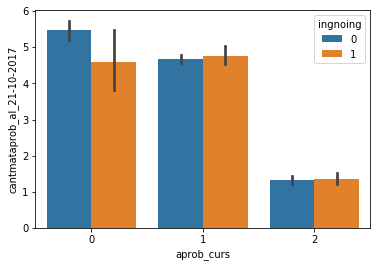

In [290]:
ax = sns.barplot(x="aprob_curs", y='cantmataprob_al_21-10-2017', hue='ingnoing', data=datos)

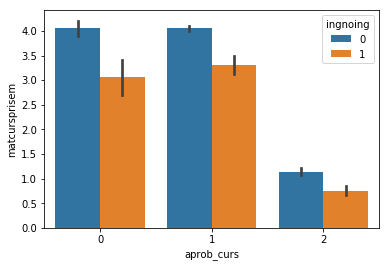

In [291]:
ax = sns.barplot(x="aprob_curs", y="matcursprisem", hue='ingnoing', data=datos)

Entre lxs que cursan ingenierías y otras carreras, no hay diferencias en el nro de materias cursadas en el primer semestre (considerando los que aprobaron matemáticas antes de iniciarse el cuatrimestre). Pero sí se ve un mayor número de materias aprobadas para lxs estudiantes de ingeniería que rindieron el no presencial. Para evaluar si esas diferencias son significativas hacemos un test de hipótesis no paramétrico (Mann-Whitney):

In [294]:
from scipy.stats import mannwhitneyu

#### general

In [305]:
d1 = datos.loc[datos.aprob_curs==0,"matcursprisem"]
d2 = datos.loc[datos.aprob_curs==1,"matcursprisem"]
stat, p = mannwhitneyu(d1, d2)
display(stat,p)

115698.0

0.10859492527977038

In [306]:
d1 = datos.loc[datos.aprob_curs==0,'cantmataprob_al_21-10-2017']
d2 = datos.loc[datos.aprob_curs==1,'cantmataprob_al_21-10-2017']
stat, p = mannwhitneyu(d1, d2)
display(stat,p)

93371.0

1.5864317793167042e-07

#### ingenierías y no ingenierías

In [307]:
d1 = datos.loc[(datos.aprob_curs==0)&(datos.ingnoing==0),"matcursprisem"]
d2 = datos.loc[(datos.aprob_curs==1)&(datos.ingnoing==0),"matcursprisem"]
stat, p = mannwhitneyu(d1, d2)
display(stat,p)

88377.5

0.049717199112223984

In [308]:
d1 = datos.loc[(datos.aprob_curs==0)&(datos.ingnoing==1),"matcursprisem"]
d2 = datos.loc[(datos.aprob_curs==1)&(datos.ingnoing==1),"matcursprisem"]
stat, p = mannwhitneyu(d1, d2)
display(stat,p)

1260.5

0.05345972152990992

In [309]:
d1 = datos.loc[(datos.aprob_curs==0)&(datos.ingnoing==0),'cantmataprob_al_21-10-2017']
d2 = datos.loc[(datos.aprob_curs==1)&(datos.ingnoing==0),'cantmataprob_al_21-10-2017']
stat, p = mannwhitneyu(d1, d2)
display(stat,p)

69647.5

1.7626108409691625e-08

In [310]:
d1 = datos.loc[(datos.aprob_curs==0)&(datos.ingnoing==1),'cantmataprob_al_21-10-2017']
d2 = datos.loc[(datos.aprob_curs==1)&(datos.ingnoing==1),'cantmataprob_al_21-10-2017']
stat, p = mannwhitneyu(d1, d2)
display(stat,p)

1500.5

0.31267287394595733

### Conclusiones 
No hay diferencias significativas entre la cantidad de materias cursadas en el primer semestre entre lxs estudiantes que aprueban el cursillo no presencial y los que lo aprueban presencial (antes del 30 de marzo). 
Sí se ven diferencias en la cantidad de materias aprobadas. Los estudiantes que aprueban el cursillo no presencial aprueban en promedio más materias que los que aprueban el cursillo presencial. Cuando miramos por carreras (ingenierías y no ingenierías), esa diferencia se mantiene entre lxs estudiantes de ingeniería y no de las demás carreras.